In [165]:
import pandas as pd
import random
import seaborn as sns
import time
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import math
import seaborn as sns
import plotly.express as px
warnings.filterwarnings("ignore")
seed = 42
random.seed(seed)
np.random.seed(seed)

In [166]:
def load_excel_to_dataframe(file_path):
    """
    Reads an Excel file into a Pandas DataFrame and measures the loading time.
    
    Args:
        file_path (str): The path to the Excel file.

    Returns:
        pd.DataFrame: The loaded DataFrame.
        float: The loading time in seconds.
    """
    start_time = time.time()
    df = pd.read_excel(file_path)
    end_time = time.time()
    loading_time = end_time - start_time
    return df, loading_time

In [167]:
loaded_df, loading_time = load_excel_to_dataframe("data/Online Retail.xlsx")
loaded_df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [168]:
print(f"Loading time: {loading_time} seconds")

Loading time: 29.68032956123352 seconds


### Data Exploration

In [169]:
# check shape of the dataset, (row, column)
loaded_df.shape

(541909, 8)

In [170]:
print('The Datset consists of {} features & {} samples.'.format(loaded_df.shape[1], loaded_df.shape[0]))

The Datset consists of 8 features & 541909 samples.


In [171]:
loaded_df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [172]:
# check the data type of all columns
loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [173]:
# Generate summary statistics of the numeric columns in the DataFrame using the Pandas describe() method.
# loaded_df.describe().transpose()
loaded_df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

In [174]:
# check missing or null value
loaded_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [175]:
def null_value_percentage(df):
    null_values = df.isna().sum() / len(df)
    percentage_null_values = null_values.apply(lambda x: f"{x:.1%}")
    return percentage_null_values

In [176]:
null_value_percentage(loaded_df)

InvoiceNo       0.0%
StockCode       0.0%
Description     0.3%
Quantity        0.0%
InvoiceDate     0.0%
UnitPrice       0.0%
CustomerID     24.9%
Country         0.0%
dtype: object

In [177]:
# handle null values
loaded_df.dropna(inplace=True)

In [178]:
null_value_percentage(loaded_df)

InvoiceNo      0.0%
StockCode      0.0%
Description    0.0%
Quantity       0.0%
InvoiceDate    0.0%
UnitPrice      0.0%
CustomerID     0.0%
Country        0.0%
dtype: object

In [179]:
loaded_df.shape

(406829, 8)

In [180]:
def conver_negative_value(x):
  if x[0]=="-":
    return float(x[1:])
  else:
    return float(x)

In [181]:
# Remove negative values in quantity
loaded_df['Quantity'] = loaded_df['Quantity'].astype(str)
loaded_df['Quantity'] = loaded_df['Quantity'].apply(conver_negative_value)

In [182]:
loaded_df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [183]:
loaded_df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       13.412279  2011-07-10 16:30:57.879207424       3.460471   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.624170                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

### Exploratory Data Analysis (EDA)

***Detect and resolve outliers***

<Axes: ylabel='Quantity'>

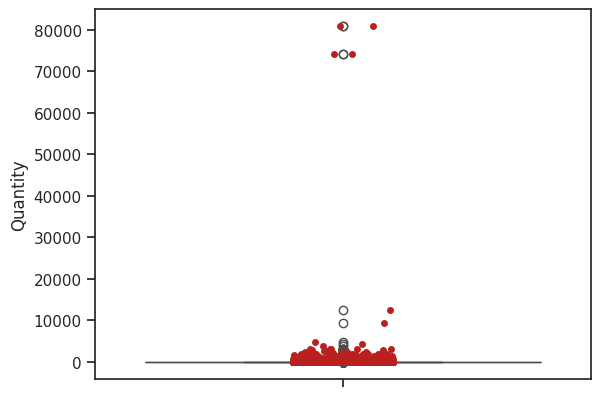

In [184]:
# Detect outlier for quantity
sns.boxplot( y='Quantity',data=loaded_df)
sns.stripplot(y='Quantity',data=loaded_df, color="#ba2020")

<Axes: ylabel='Quantity'>

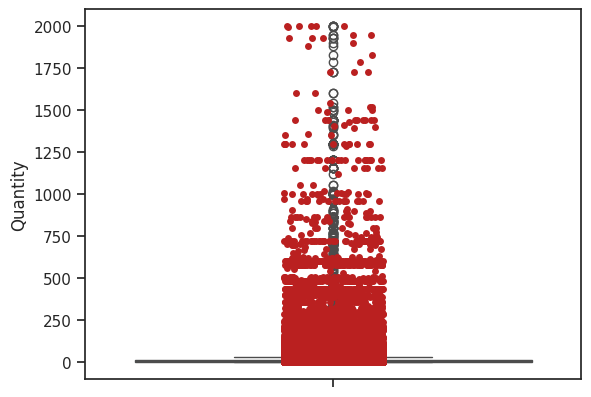

In [185]:
# remove outlier for quantity
outliers_index = loaded_df.loc[loaded_df['Quantity']>2000].index
loaded_df = loaded_df.drop(outliers_index)
sns.boxplot( y='Quantity',data=loaded_df)
sns.stripplot(y='Quantity',data=loaded_df, color="#ba2020")

<Axes: ylabel='UnitPrice'>

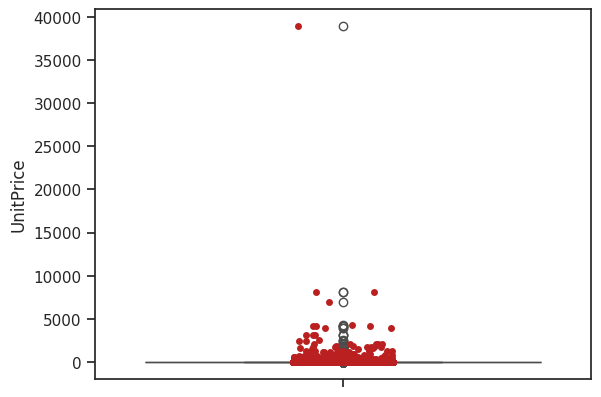

In [186]:
# Detect outlier for Unit Price
sns.boxplot( y='UnitPrice',data=loaded_df)
sns.stripplot(y='UnitPrice',data=loaded_df, color="#ba2020")

<Axes: ylabel='UnitPrice'>

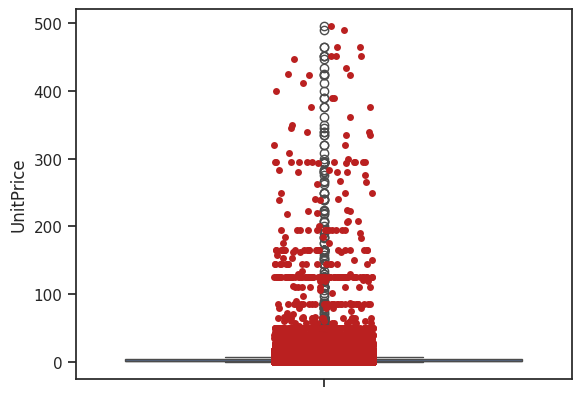

In [187]:
# Remove outlier for Unit Price
outliers_index = loaded_df.loc[loaded_df['UnitPrice']>500].index
loaded_df = loaded_df.drop(outliers_index)
sns.boxplot( y='UnitPrice',data=loaded_df)
sns.stripplot(y='UnitPrice',data=loaded_df, color="#ba2020")

<Axes: >

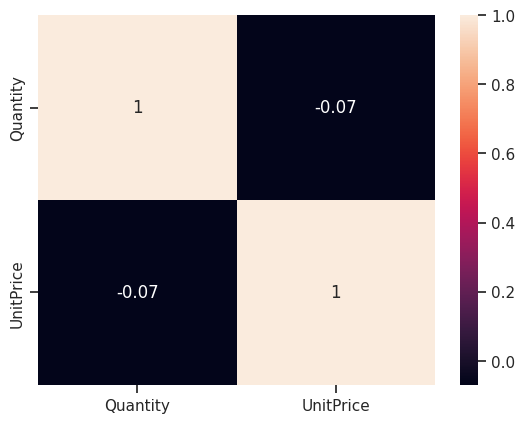

In [188]:
# Correlation matrix between the "Quantity" and "UnitPrice"
sns.heatmap(loaded_df[['Quantity', 'UnitPrice']].corr(), annot = True)

In [189]:
loaded_df[['Quantity', 'UnitPrice']].skew()

Quantity     19.146478
UnitPrice    34.236111
dtype: float64

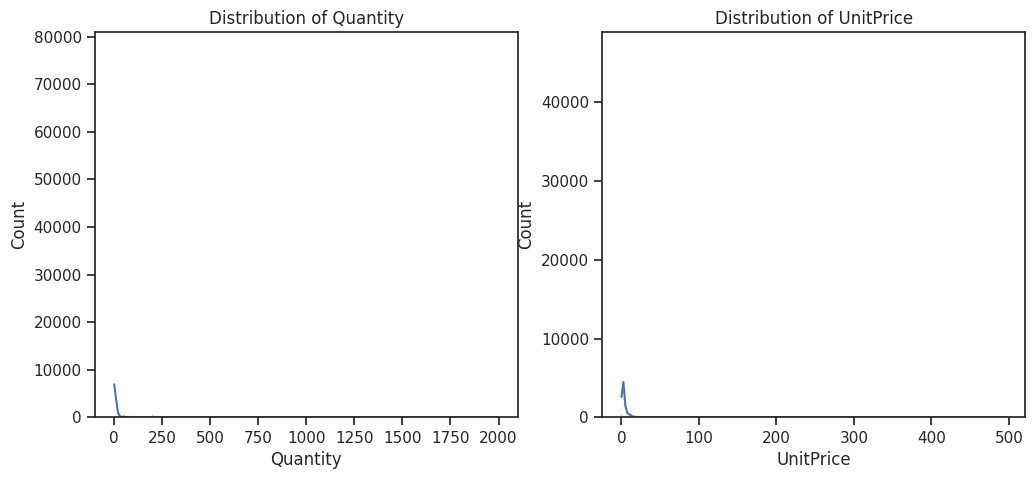

In [190]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot the histogram for 'Quantity'
sns.histplot(data=loaded_df, x='Quantity', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Quantity')
# Plot the histogram for 'UnitPrice'
sns.histplot(data=loaded_df, x='UnitPrice', kde=True, ax=axes[1])
axes[1].set_title('Distribution of UnitPrice')
plt.show()

### Feature Engineering

In [191]:
# Convert to datetime to proper datatype
loaded_df['InvoiceDate'] = pd.to_datetime(loaded_df['InvoiceDate'],format='%d-%m-%Y %H:%M')
loaded_df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [192]:
loaded_df["InvoiceDateDay"] = loaded_df["InvoiceDate"].dt.date
loaded_df["InvoiceDateTime"] = loaded_df["InvoiceDate"].dt.time
loaded_df["InvoiceYear"] = loaded_df["InvoiceDate"].dt.year
loaded_df["InvoiceMonth"] = loaded_df["InvoiceDate"].dt.month
loaded_df["InvoiceMonthName"] = loaded_df["InvoiceDate"].dt.month_name()
loaded_df["InvoiceDay"] = loaded_df["InvoiceDate"].dt.day
loaded_df["InvoiceDayName"] = loaded_df["InvoiceDate"].dt.day_name()
loaded_df["InvoiceHour"] = loaded_df["InvoiceDate"].dt.hour
loaded_df["InvoiceDayOfWeek"] = loaded_df["InvoiceDate"].dt.day_of_week
loaded_df["InvoiceWeekOfYear"] = loaded_df["InvoiceDate"].dt.isocalendar().week

In [193]:
# New attribute: amount
loaded_df['Amount'] = loaded_df['Quantity']*loaded_df['UnitPrice']
loaded_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDateDay  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   

  InvoiceDateTime  InvoiceYear  InvoiceMonth InvoiceMonthName  InvoiceDay  \
0        08:26:00         2010            12         December           1   
1        08:26:00         2010            12         December           1   
2        08:26:00         2010            12         December           1   
3        08:26:00         2010            12         December           1   
4        08:26:00         2010            12         December           1   

  InvoiceDayName  InvoiceHour  InvoiceDayOfWeek  InvoiceWeekOfYear  Amount  
0      Wednesday            8                 2                 48   15.30  
1      Wednesday            8                 2                 48   20.34  
2      Wednesday            8                 2                 48   22.00  
3      Wednesday            8                 2                 48   20.34  
4      Wednesday            8                 2                 48   20.34

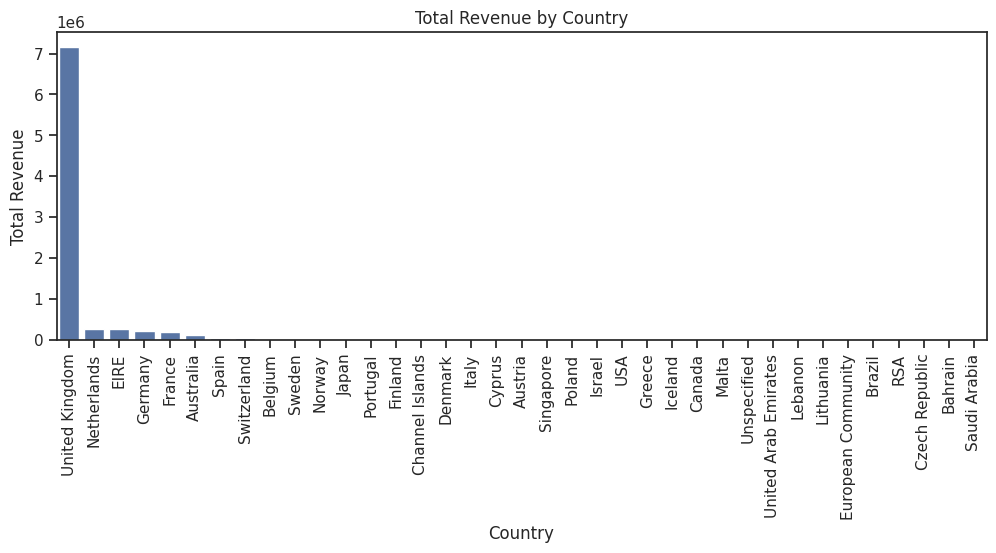

In [194]:
# Revenue by Country
country_revenue = loaded_df.groupby("Country")["Amount"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 4))
plt.title("Total Revenue by Country")
sns.barplot(data=country_revenue, x="Country", y="Amount")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.show()

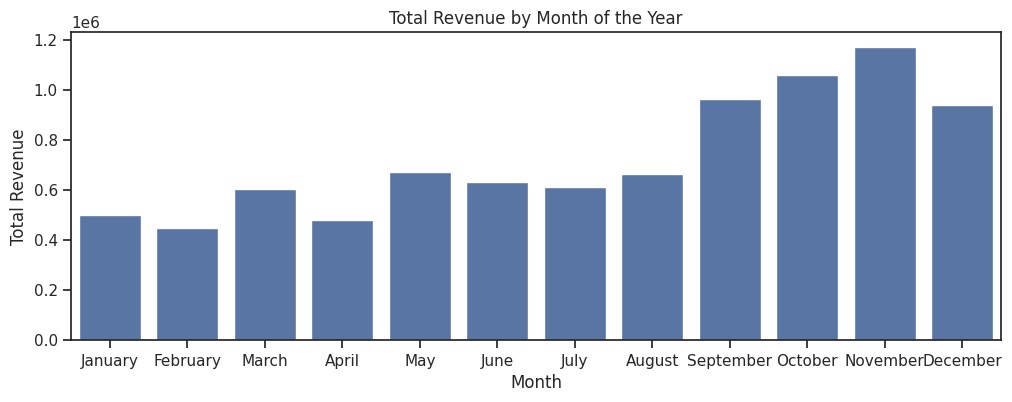

In [195]:
#  Revenue by Month of the Year
revenue_month = loaded_df.groupby(["InvoiceMonth", "InvoiceMonthName"])["Amount"].sum().reset_index()
plt.figure(figsize=(12, 4))
plt.title("Total Revenue by Month of the Year")
sns.barplot(data=revenue_month, x="InvoiceMonthName", y="Amount")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

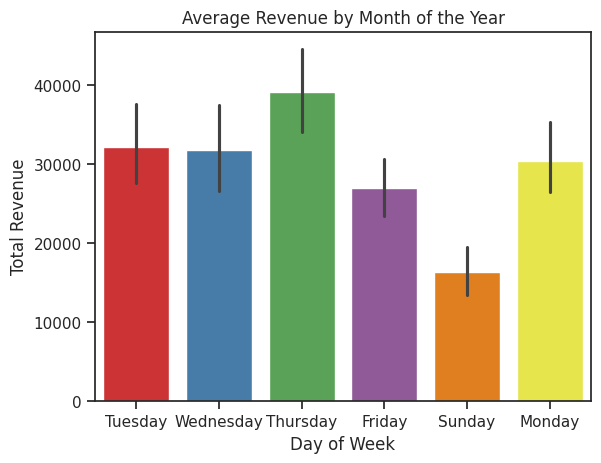

In [196]:
revenue_day = loaded_df.groupby(["InvoiceWeekOfYear", "InvoiceDayOfWeek", "InvoiceDayName"])["Amount"].sum().reset_index()
revenue_day.groupby(["InvoiceDayOfWeek", "InvoiceDayName"])["Amount"].mean().reset_index()
plt.title("Average Revenue by Month of the Year")
sns.barplot(data=revenue_day, x="InvoiceDayName", y="Amount", hue="InvoiceDayName", palette="Set1", legend=False)
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.show()

In [197]:
# Top 10 Customers by Revenue
top_10_customers = loaded_df["Amount"].sort_values(ascending=False).head(10)
top_10_customers

348325    7144.72
160143    4921.50
52709     4921.50
160542    4632.00
52772     4522.50
160141    4522.50
244419    4401.00
160544    4254.50
52134     4121.64
533812    3861.00
Name: Amount, dtype: float64

In [198]:
# Calculates the sum of the 'Amount' column for each customer. 
df_amount_customer = loaded_df.groupby('CustomerID')['Amount'].sum().reset_index()
df_amount_customer.head()

CustomerID   Amount
0     12347.0  4310.00
1     12348.0  1797.24
2     12349.0  1757.55
3     12350.0   334.40
4     12352.0  3466.67

In [199]:
# New Attribute : Frequency
# count the number of unique invoice numbers for each customer
df_unique_invoice = loaded_df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
df_unique_invoice.head()

CustomerID  InvoiceNo
0     12347.0        182
1     12348.0         31
2     12349.0         73
3     12350.0         17
4     12352.0         95

In [200]:
df_unique_invoice.columns

Index(['CustomerID', 'InvoiceNo'], dtype='object')

In [201]:
# Rename invoice colunn to Frequency
df_unique_invoice.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
df_unique_invoice.head()

CustomerID  Frequency
0     12347.0        182
1     12348.0         31
2     12349.0         73
3     12350.0         17
4     12352.0         95

In [202]:
# Merging the two dfs
merged_df = df_amount_customer.merge(df_unique_invoice, on='CustomerID')
# another way 
# merged_df = pd.merge(df_amount_customer, df_unique_invoice, on='CustomerID', how='inner')
merged_df.head()

CustomerID   Amount  Frequency
0     12347.0  4310.00        182
1     12348.0  1797.24         31
2     12349.0  1757.55         73
3     12350.0   334.40         17
4     12352.0  3466.67         95

In [203]:
# Get the maximum date to know the last transaction date in our dataset
max_date = max(loaded_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [204]:
# calculate the time difference between the maximum date in the dataset and the transaction date for each record
loaded_df['DifferenceDate'] = max_date - loaded_df['InvoiceDate']
loaded_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDateDay  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     2010-12-01   

  InvoiceDateTime  InvoiceYear  InvoiceMonth InvoiceMonthName  InvoiceDay  \
0        08:26:00         2010            12         December           1   
1        08:26:00         2010            12         December           1   
2        08:26:00         2010            12         December           1   
3        08:26:00         2010            12         December           1   
4        08:26:00         2010            12         December           1   

  InvoiceDayName  InvoiceHour  InvoiceDayOfWeek  InvoiceWeekOfYear  Amount  \
0      Wednesday            8                 2                 48   15.30   
1      Wednesday            8                 2                 48   20.34   
2      Wednesday            8                 2                 48   22.00   
3      Wednesday            8                 2                 48   20.34   
4      Wednesday            8                 2                 48   20.34   

     DifferenceDate  
0 373 days 04:24:00  
1 373 days 04:24:00  
2 373 days 04:24:00  
3 373 days 04:24:00  
4 373 days 04:24:00

In [205]:
# Get the recency of customers 
df_recent_customer = loaded_df.groupby('CustomerID')['DifferenceDate'].min().reset_index()
df_recent_customer.head()

CustomerID    DifferenceDate
0     12347.0   1 days 20:58:00
1     12348.0  74 days 23:37:00
2     12349.0  18 days 02:59:00
3     12350.0 309 days 20:49:00
4     12352.0  35 days 22:13:00

In [206]:
# Extract days only
df_recent_customer['DifferenceDate'] = df_recent_customer['DifferenceDate'].dt.days
df_recent_customer.head()

CustomerID  DifferenceDate
0     12347.0               1
1     12348.0              74
2     12349.0              18
3     12350.0             309
4     12352.0              35

In [207]:
merged_df.head()

CustomerID   Amount  Frequency
0     12347.0  4310.00        182
1     12348.0  1797.24         31
2     12349.0  1757.55         73
3     12350.0   334.40         17
4     12352.0  3466.67         95

In [208]:
# Now merging  tha dataframes for getting the final RFM dataframe
merged_final_df = merged_df.merge(df_recent_customer, on='CustomerID')
merged_final_df.rename(columns={'DifferenceDate': 'Recency'}, inplace=True)
merged_final_df.head()

CustomerID   Amount  Frequency  Recency
0     12347.0  4310.00        182        1
1     12348.0  1797.24         31       74
2     12349.0  1757.55         73       18
3     12350.0   334.40         17      309
4     12352.0  3466.67         95       35

In [209]:
merged_final_df.describe()

CustomerID         Amount    Frequency      Recency
count   4364.000000    4364.000000  4364.000000  4364.000000
mean   15301.359762    2007.692485    93.198442    91.028185
std     1721.232921    8586.165692   232.517928   100.773453
min    12347.000000       1.250000     1.000000     0.000000
25%    13815.750000     307.750000    17.000000    16.000000
50%    15302.000000     675.285000    42.000000    49.000000
75%    16778.250000    1664.602500   102.000000   142.000000
max    18287.000000  275931.020000  7983.000000   373.000000

### Data visualization

In [210]:
# Create a new DataFrame containing the selected attributes
attributes = ['Recency', 'Frequency', 'Amount']
new_df = merged_final_df[attributes]
new_df.head(3)

Recency  Frequency   Amount
0        1        182  4310.00
1       74         31  1797.24
2       18         73  1757.55

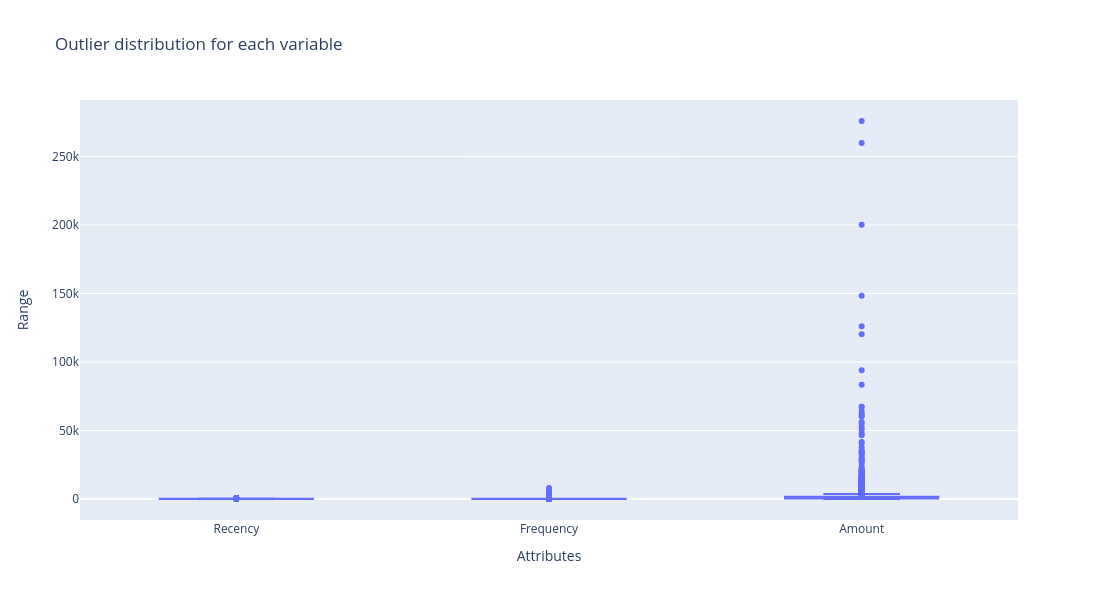

In [211]:


# Create a box plot with Plotly
fig = px.box(new_df, y=attributes, labels={'variable': 'Attributes', 'value': 'Range'}, title="Outlier distribution for each variable")
fig.update_layout(
    xaxis=dict(title="Attributes"),
    yaxis=dict(title="Range"),
    showlegend=False,
    boxmode='group',
    width=800, height=600
)
fig.show()

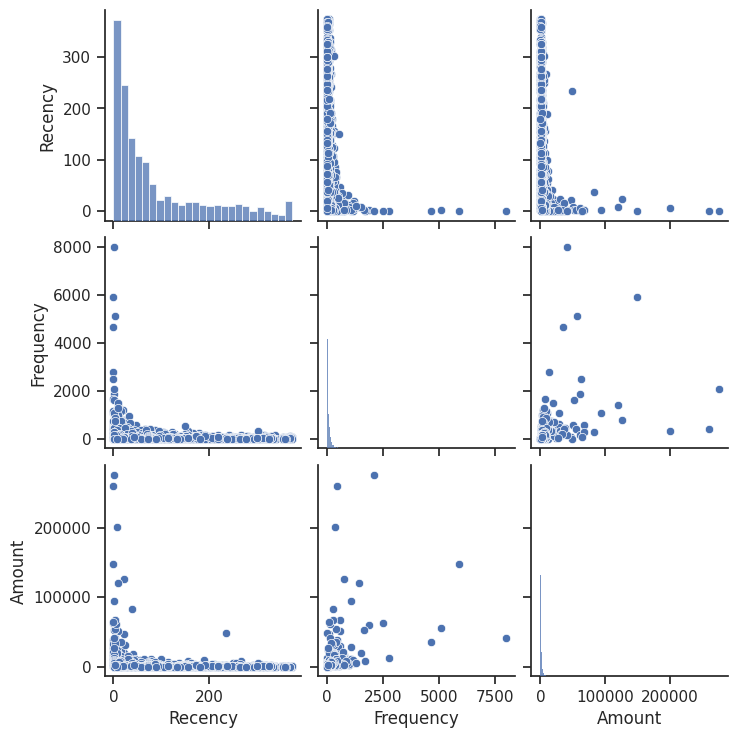

In [212]:
final_rfa_df = merged_final_df[['Recency', 'Frequency', 'Amount']]
sns.pairplot(final_rfa_df)

                                   RMF Variables Distribution                                   


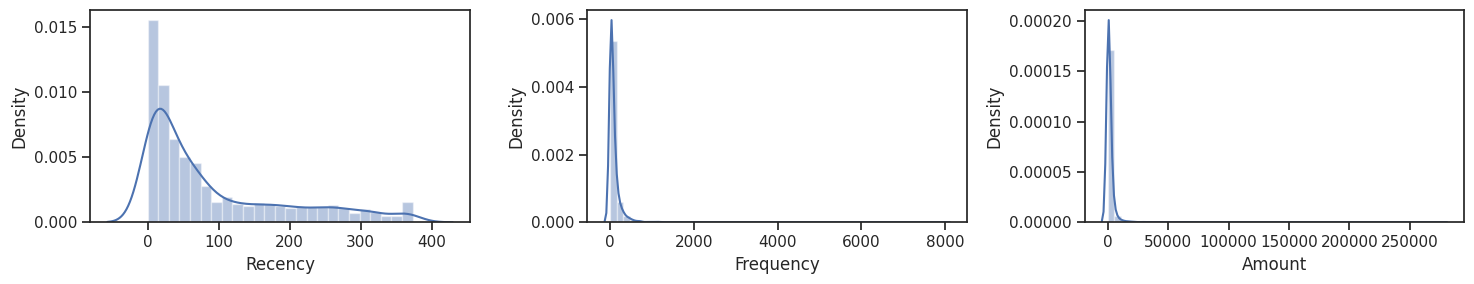

In [213]:
# Understanding the RFM Distribution

print('\033[1mRMF Variables Distribution'.center(100))

n=3
nf = [i for i in final_rfa_df.columns]

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.distplot(final_rfa_df[nf[c]])
plt.tight_layout()
plt.show()

In [214]:
# Removing outliers for amount
Q1 = merged_final_df['Amount'].quantile(0.05) # 5% lower bound
Q3 = merged_final_df['Amount'].quantile(0.95) # 95% upperbound bound
# IQR Calculation - Statistical
IQR = Q3 - Q1
merged_final_df = merged_final_df[(merged_final_df['Amount'] >= Q1 - 1.5*IQR) & (merged_final_df['Amount'] <= Q3 + 1.5*IQR)]
merged_final_df.head()

CustomerID   Amount  Frequency  Recency
0     12347.0  4310.00        182        1
1     12348.0  1797.24         31       74
2     12349.0  1757.55         73       18
3     12350.0   334.40         17      309
4     12352.0  3466.67         95       35

In [215]:
# Removing outliers for recency
Q1 = merged_final_df['Recency'].quantile(0.05) # 5% lower bound
Q3 = merged_final_df['Recency'].quantile(0.95) # 95% upperbound bound
# IQR Calculation - Statistical
IQR = Q3 - Q1
merged_final_df = merged_final_df[(merged_final_df['Recency'] >= Q1 - 1.5*IQR) & (merged_final_df['Recency'] <= Q3 + 1.5*IQR)]
merged_final_df.head()

CustomerID   Amount  Frequency  Recency
0     12347.0  4310.00        182        1
1     12348.0  1797.24         31       74
2     12349.0  1757.55         73       18
3     12350.0   334.40         17      309
4     12352.0  3466.67         95       35

In [216]:
# Removing outliers for frequency
Q1 = merged_final_df['Frequency'].quantile(0.05) # 5% lower bound
Q3 = merged_final_df['Frequency'].quantile(0.95) # 95% upperbound bound
# IQR Calculation - Statistical
IQR = Q3 - Q1
merged_final_df = merged_final_df[(merged_final_df['Frequency'] >= Q1 - 1.5*IQR) & (merged_final_df['Frequency'] <= Q3 + 1.5*IQR)]
merged_final_df.head()

CustomerID   Amount  Frequency  Recency
0     12347.0  4310.00        182        1
1     12348.0  1797.24         31       74
2     12349.0  1757.55         73       18
3     12350.0   334.40         17      309
4     12352.0  3466.67         95       35

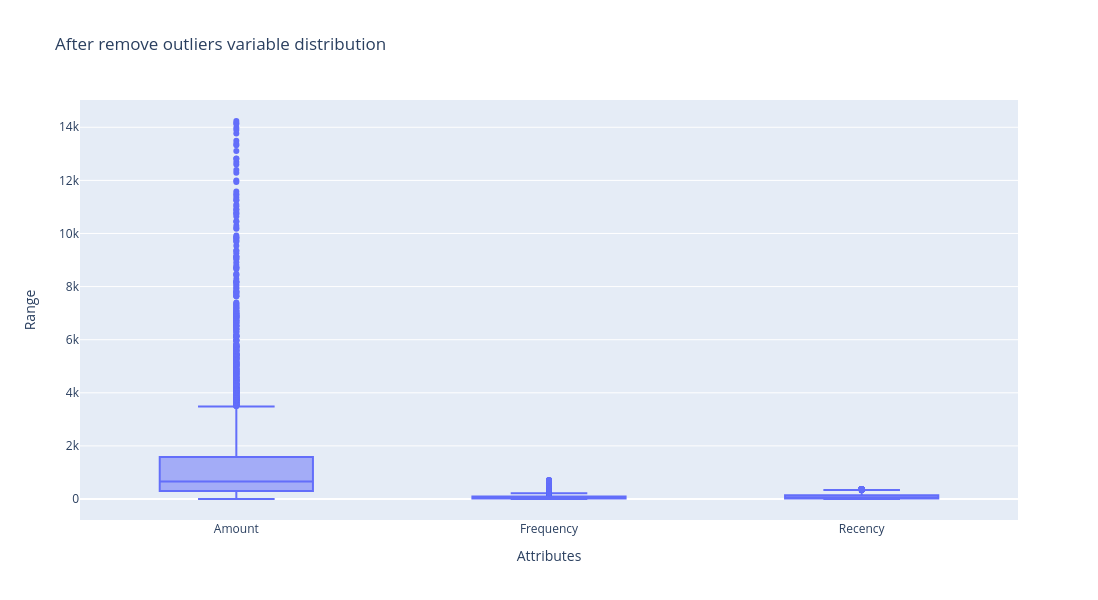

In [217]:
attributes = ['Amount', 'Frequency', 'Recency']
fig = px.box(merged_final_df, y=attributes, title="After remove outliers variable distribution", 
             labels={'variable': 'Attributes', 'value': 'Range'},
             boxmode='group', points='outliers')
fig.update_layout(
    xaxis=dict(title="Attributes", title_font=dict(size=14)),
    yaxis=dict(title="Range", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)
fig.show()

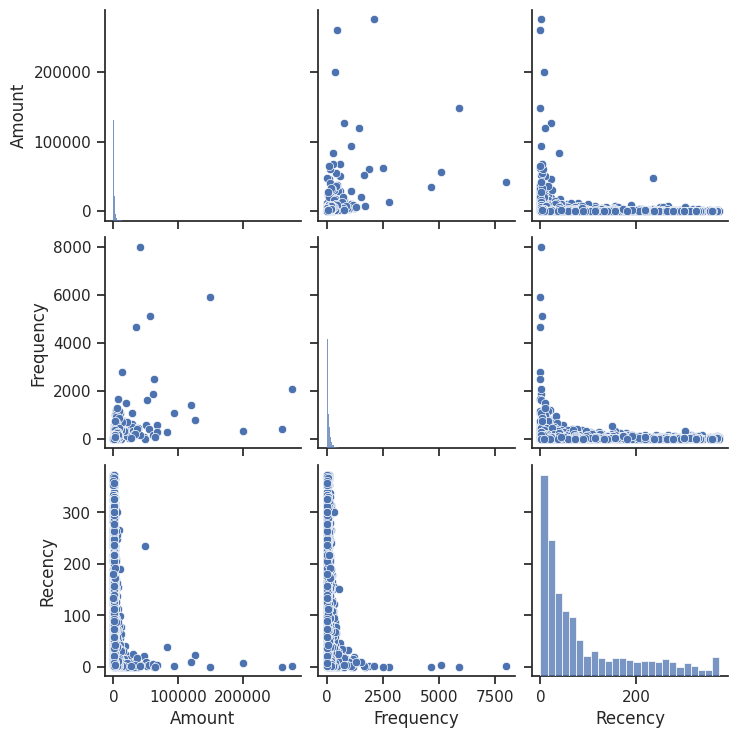

In [218]:
final_rfa_df = final_rfa_df[['Amount', 'Frequency', 'Recency']]
sns.pairplot(final_rfa_df)

                        RMF Variables Distribution After Reomve Outlier                         


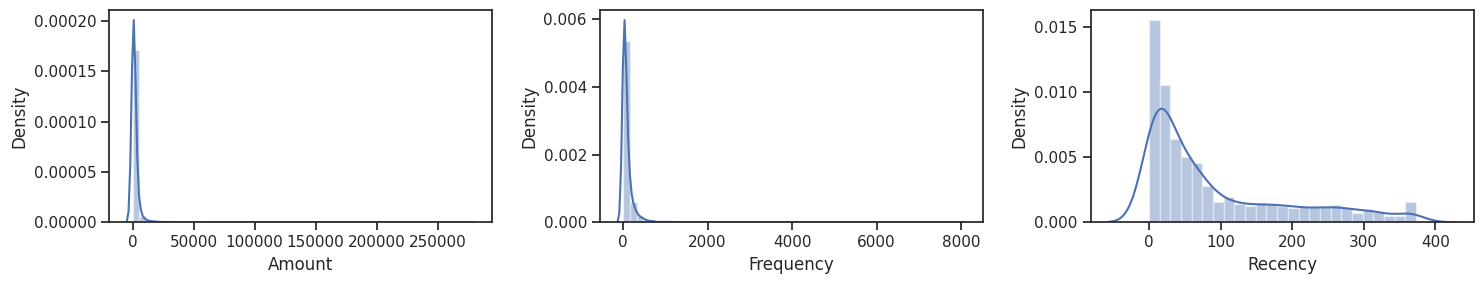

In [219]:
# Understanding the RFM Distribution After remove outlier
print('\033[1mRMF Variables Distribution After Reomve Outlier'.center(100))

n=3
nf = [i for i in final_rfa_df.columns]

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.distplot(final_rfa_df[nf[c]])
plt.tight_layout()
plt.show()

### Data Manipulation

In [220]:
# Applying Standardization
# Instantiate
scaler = StandardScaler()
# fit_transform
final_rfa_df_scaled = scaler.fit_transform(final_rfa_df)
final_rfa_df_scaled

array([[ 0.26817225,  0.3819565 , -0.89347441],
       [-0.02451346, -0.26753021, -0.16899427],
       [-0.02913654, -0.08687827, -0.72475986],
       ...,
       [-0.21294744, -0.34495246, -0.8339281 ],
       [ 0.01015558,  2.85086624, -0.87362564],
       [-0.01984961, -0.09978198, -0.48657461]])

In [221]:
final_rfa_df_scaled.shape

(4364, 3)

In [225]:
final_rfa_df_scaled = pd.DataFrame(final_rfa_df_scaled)
final_rfa_df_scaled.columns = ['Recency', 'Frequency', 'Amount']
final_rfa_df_scaled.head()

Recency  Frequency    Amount
0  0.268172   0.381957 -0.893474
1 -0.024513  -0.267530 -0.168994
2 -0.029137  -0.086878 -0.724760
3 -0.194905  -0.327748  2.163236
4  0.169941   0.007749 -0.556045

### Building Models

***K-Means Clustering***

In [226]:
final_rfa_df_scaled_knn = final_rfa_df_scaled.copy()

At n_clusters=1, the Elbow score is 13092.000000000004
At n_clusters=2, the Elbow score is 8997.54572834228
At n_clusters=3, the Elbow score is 5422.63140617331
At n_clusters=4, the Elbow score is 4096.495043273552
At n_clusters=5, the Elbow score is 3024.57482405032
At n_clusters=6, the Elbow score is 2334.500221526098
At n_clusters=7, the Elbow score is 1876.4987442419665
At n_clusters=8, the Elbow score is 1630.2841489959087
At n_clusters=9, the Elbow score is 1438.5137715112098


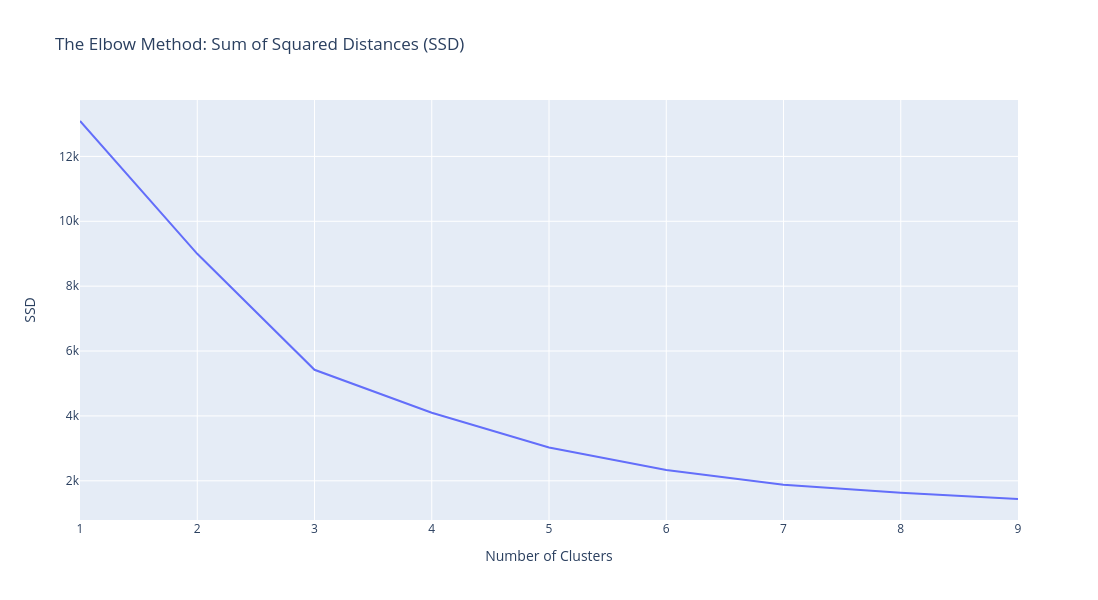

In [227]:
# Finding the optimal cluster number, we use elbow Method

squared_distances = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=50, n_init=10)
    kmeans.fit(final_rfa_df_scaled_knn)
    squared_distances[k] = kmeans.inertia_
    print("At n_clusters={0}, the Elbow score is {1}".format(k, kmeans.inertia_))

# Elbow Plot by matplotlib
# plt.title('The Elbow Method: Sum of Squared Distances')
# plt.xlabel('k')
# plt.ylabel('squared_distances')
# sns.pointplot(x=list(squared_distances.keys()), y=list(squared_distances.values()))
# plt.show()


# Elbow Plot by plotly
df = pd.DataFrame(list(squared_distances.items()), columns=['Number of Clusters', 'Sum of Squared Distances (SSD)'])
# Use Plotly Express to create the line plot
fig = px.line(df, x='Number of Clusters', y='Sum of Squared Distances (SSD)',
              title="The Elbow Method: Sum of Squared Distances (SSD)",
              labels={'Number of Clusters': 'Number of Clusters', 'Sum of Squared Distances (SSD)': 'SSD'})
fig.update_layout(
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)
fig.show()

In [228]:
model = KMeans(n_clusters=3, random_state=42, n_init=10)
model.fit(final_rfa_df_scaled_knn)
final_rfa_df_scaled_knn["Cluster"] = model.labels_
final_rfa_df_scaled_knn.groupby('Cluster').agg({'Recency':'mean','Frequency':'mean','Amount':['mean', 'count']}).round(2)

Recency Frequency Amount      
           mean      mean   mean count
Cluster                               
0         -0.17     -0.28   1.54  1094
1          0.01      0.05  -0.51  3258
2         14.13     11.83  -0.86    12

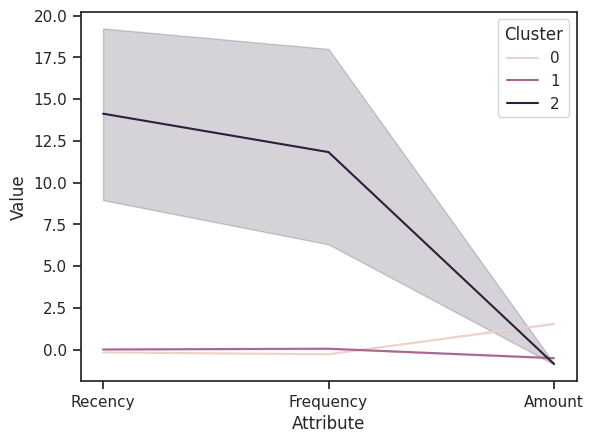

In [229]:
# Visualizing the Characteristics of the Cluster Chart
final_rfa_df_knn_normalized = pd.DataFrame(final_rfa_df_scaled_knn, columns=['Recency', 'Frequency', 'Amount'])
final_rfa_df_knn_normalized['ID'] = final_rfa_df_scaled_knn.index
final_rfa_df_knn_normalized['Cluster'] = model.labels_
df_nor_melt_knn = pd.melt(final_rfa_df_knn_normalized.reset_index(), id_vars=['ID', 'Cluster'], value_vars=['Recency','Frequency','Amount'], var_name='Attribute', value_name='Value')
# df_nor_melt.head()
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt_knn)
plt.show()

### Evaluation

***Silhouette Analysis***

Formula: silhouette(i) = (b(i) - a(i)) / max(a(i), b(i))

The silhouette score ranges from -1 to 1:

A Silhouette score of 1: This represents the best scenario, where data points within a cluster are very similar to each other (high cohesion) and well-separated from data points in other clusters (high separation).

A Silhouette score close to 0: This suggests that data points within a cluster are not clearly closer to other data points in the same cluster than to data points in neighboring clusters. It could indicate overlapping clusters or poorly defined clusters.

A Silhouette score close to -1: This indicates that data points within a cluster are more similar to data points in a different cluster, suggesting that the clustering algorithm may have grouped dissimilar data points together.

In [230]:
for k in range(2,10):
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, max_iter=50, n_init=10)
    kmeans.fit(final_rfa_df_scaled_knn)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(final_rfa_df_scaled_knn, cluster_labels)
    print("At n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

At n_clusters=2, the silhouette score is 0.6282656985231898
At n_clusters=3, the silhouette score is 0.6496626282849604
At n_clusters=4, the silhouette score is 0.6476744739474739
At n_clusters=5, the silhouette score is 0.6568776723858988
At n_clusters=6, the silhouette score is 0.6196225677444092
At n_clusters=7, the silhouette score is 0.5881738202225973
At n_clusters=8, the silhouette score is 0.431518948265992
At n_clusters=9, the silhouette score is 0.4502345158401833


In [231]:
final_rfa_df_scaled_knn

Recency  Frequency    Amount  Cluster
0     0.268172   0.381957 -0.893474        1
1    -0.024513  -0.267530 -0.168994        1
2    -0.029137  -0.086878 -0.724760        1
3    -0.194905  -0.327748  2.163236        0
4     0.169941   0.007749 -0.556045        1
...        ...        ...       ...      ...
4359 -0.212819  -0.357856  1.845656        0
4360 -0.224442  -0.370760  0.882991        0
4361 -0.212947  -0.344952 -0.833928        1
4362  0.010156   2.850866 -0.873626        1
4363 -0.019850  -0.099782 -0.486575        1

[4364 rows x 4 columns]

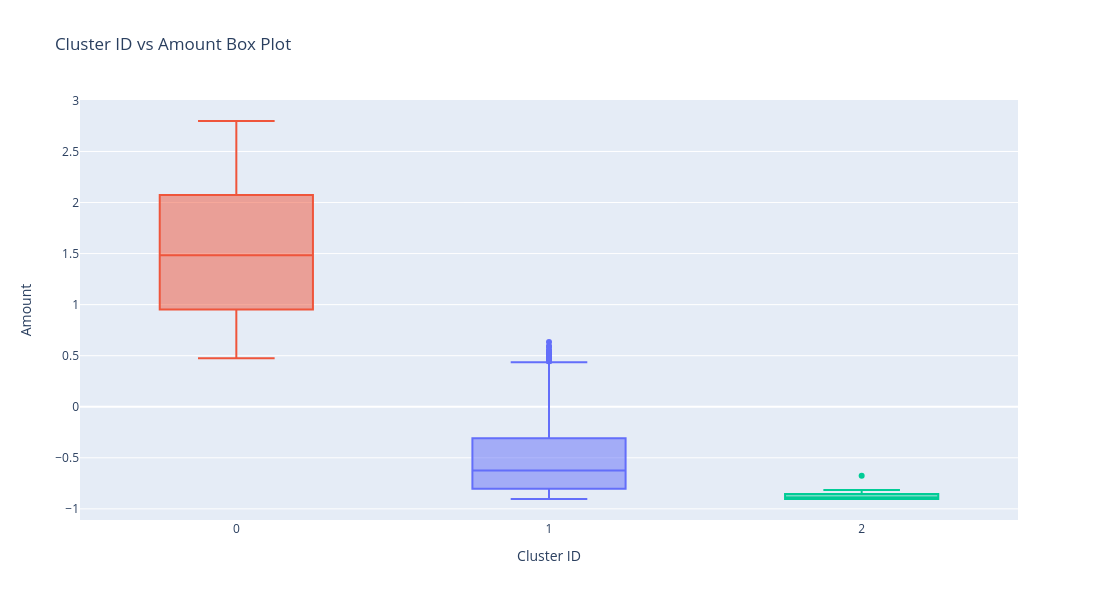

In [232]:
fig = px.box(final_rfa_df_scaled_knn, x='Cluster', y='Amount',
             title="Cluster ID vs Amount Box Plot",
             labels={'Cluster': 'Cluster ID', 'Amount': 'Amount'},
             color='Cluster')

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

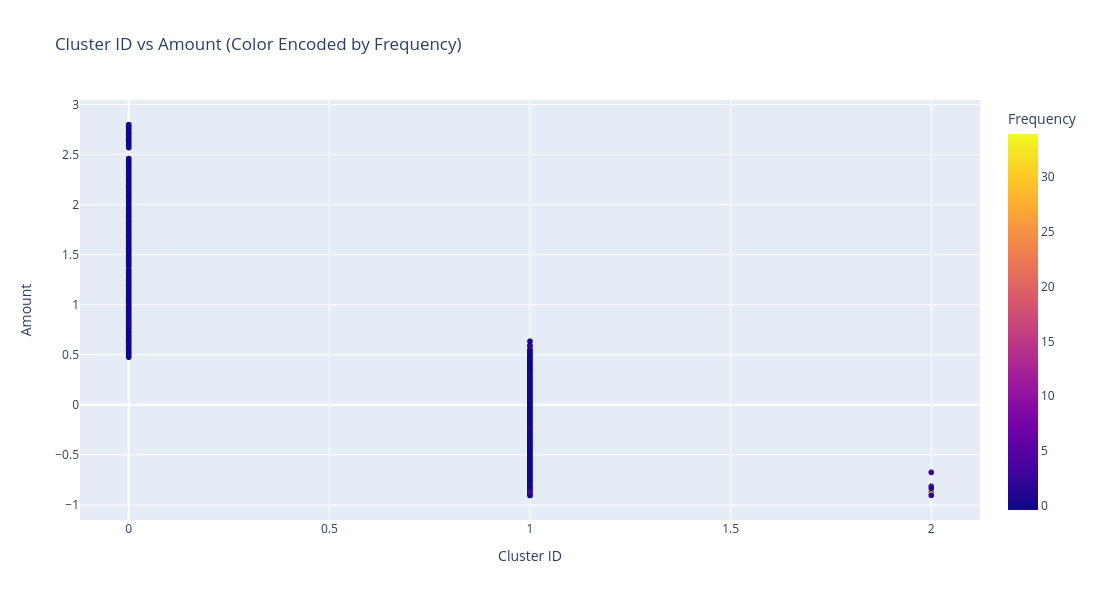

In [233]:
fig = px.scatter(final_rfa_df_scaled_knn, x='Cluster', y='Amount', color='Frequency',
                 title='Cluster ID vs Amount (Color Encoded by Frequency)',
                 labels={'Cluster': 'Cluster ID', 'Amount': 'Amount', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Amount", title_font=dict(size=14)),
    showlegend=True,
    width=800,
    height=600
)
fig.show()

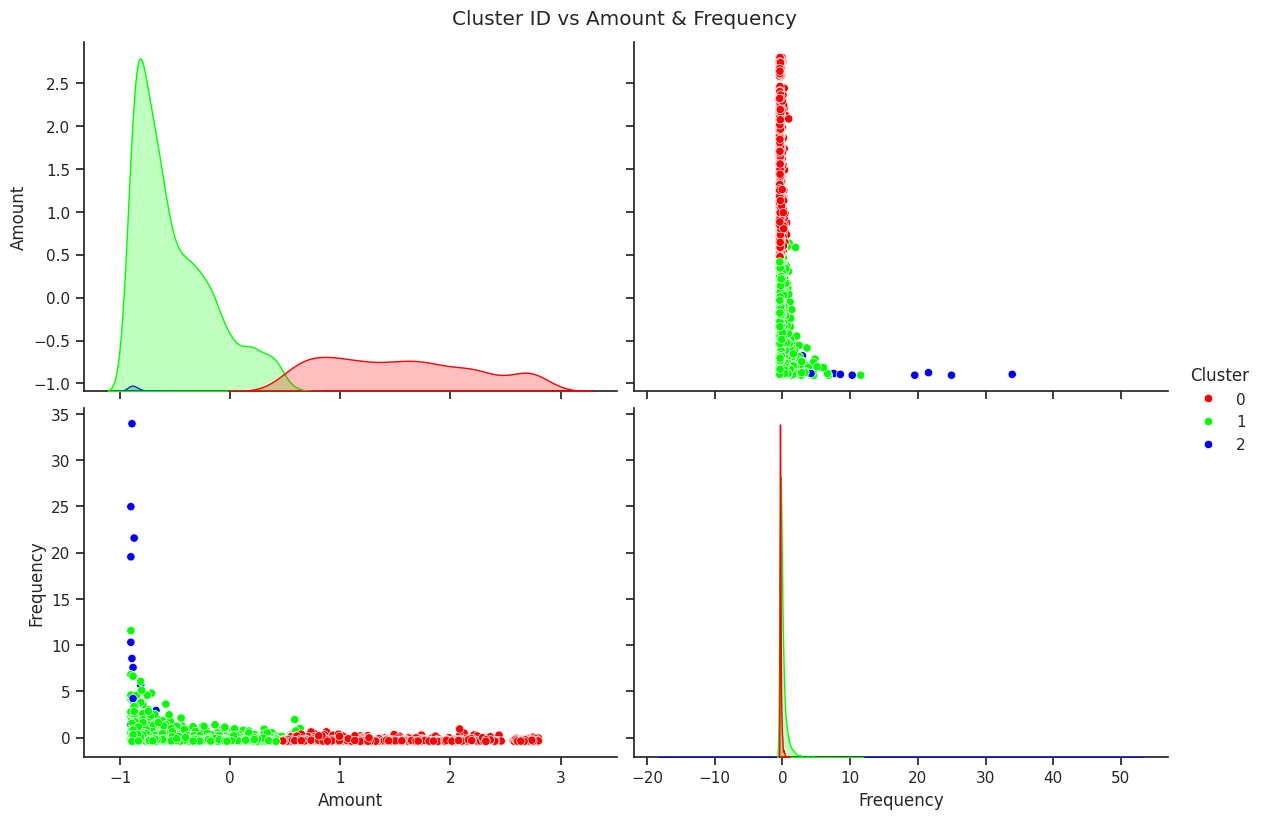

In [234]:


# Color:  Red, Green, and Blue
custom_palette = sns.color_palette(["#FF0000", "#00FF00", "#0000FF"])
sns.set(style="ticks")
sns.pairplot(final_rfa_df_scaled_knn, hue='Cluster', vars=['Amount', 'Frequency'], palette=custom_palette, height=4, aspect=1.5)
plt.suptitle('Cluster ID vs Amount & Frequency', y=1.02)
plt.show()

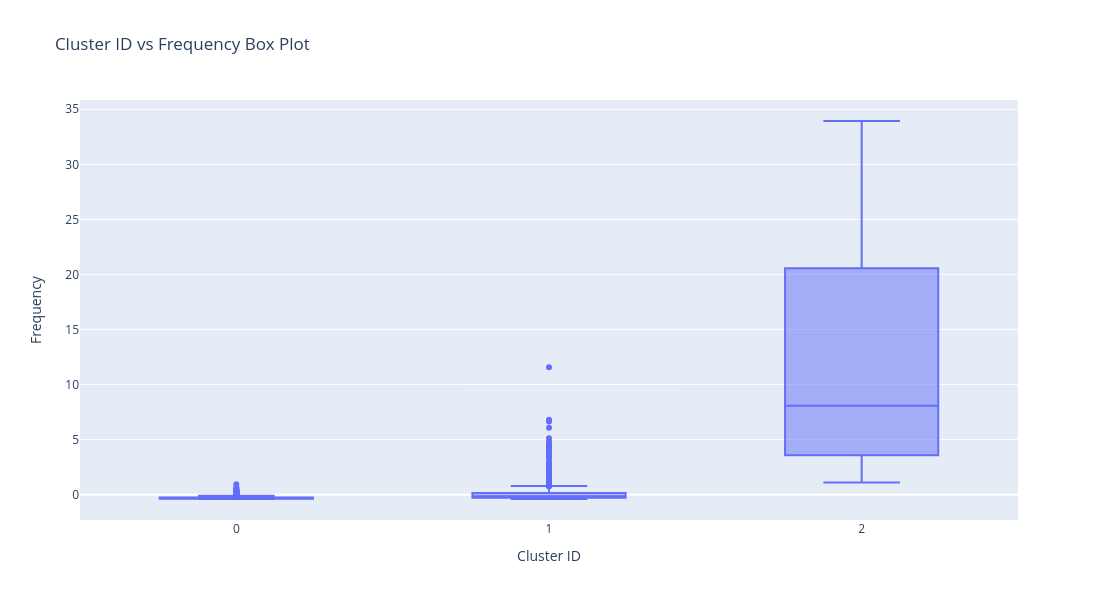

In [235]:
fig = px.box(final_rfa_df_scaled_knn, x='Cluster', y='Frequency',
             title="Cluster ID vs Frequency Box Plot",
             labels={'Cluster': 'Cluster ID', 'Frequency': 'Frequency'})

fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)

fig.show()

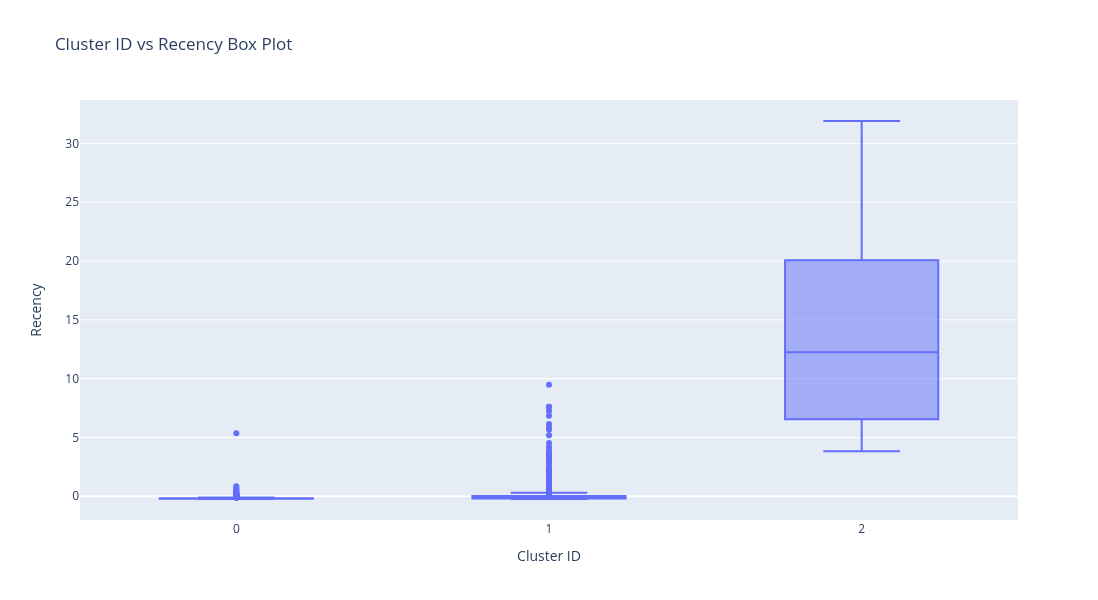

In [236]:
fig = px.box(final_rfa_df_scaled_knn, x='Cluster', y='Recency',
             title="Cluster ID vs Recency Box Plot",
             labels={'Cluster': 'Cluster ID', 'Recency': 'Recency'})
fig.update_layout(
    xaxis=dict(title="Cluster ID", title_font=dict(size=14)),
    yaxis=dict(title="Recency", title_font=dict(size=14)),
    showlegend=False,
    width=800,
    height=600
)
fig.show()

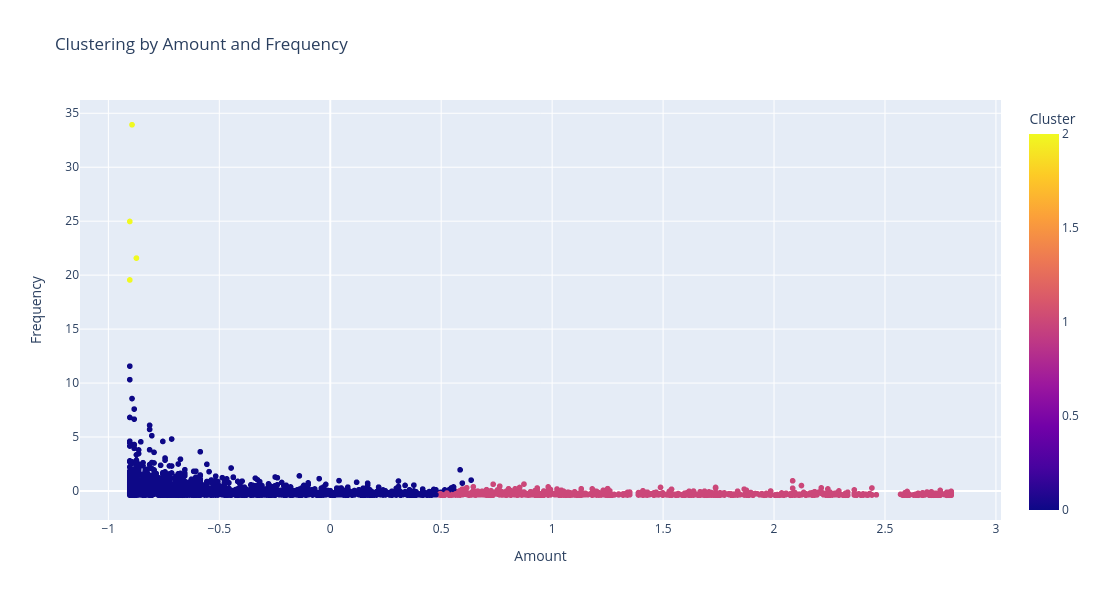

In [237]:
# Selecting the two features for clustering
data_for_knn_clustering = final_rfa_df_scaled_knn[['Amount', 'Frequency']]
n_clusters = 3
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
final_rfa_df_scaled_knn['Cluster_2D'] = kmeans.fit_predict(data_for_knn_clustering)

# Create a scatter plot with Plotly
fig = px.scatter(final_rfa_df_scaled_knn, x='Amount', y='Frequency', color='Cluster_2D',
                 title='Clustering by Amount and Frequency',
                 labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Cluster_2D': 'Cluster'})

fig.update_layout(
    xaxis=dict(title="Amount", title_font=dict(size=14)),
    yaxis=dict(title="Frequency", title_font=dict(size=14)),
    width=800,
    height=600
)

fig.show()

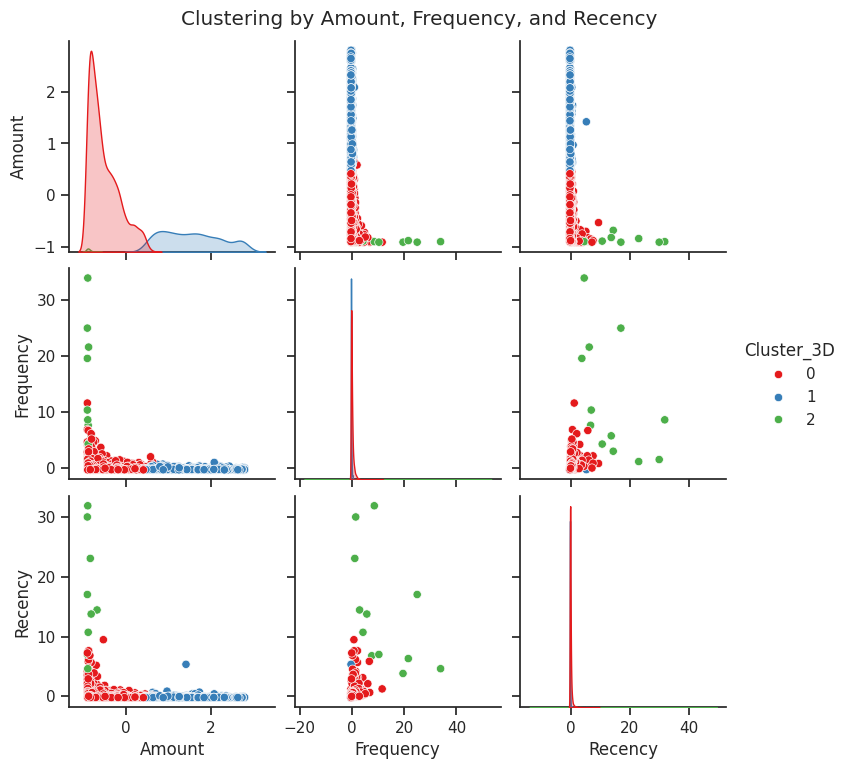

In [238]:
# Selecting the three features for clustering
data_for_knn_clustering = final_rfa_df_scaled_knn[['Amount', 'Frequency', 'Recency']]
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
final_rfa_df_scaled_knn['Cluster_3D'] = kmeans.fit_predict(data_for_knn_clustering)

# Visualize the clusters (scatter plot matrix)
sns.set(style="ticks")
sns.pairplot(final_rfa_df_scaled_knn, hue='Cluster_3D', vars=['Amount', 'Frequency', 'Recency'], palette='Set1')
plt.suptitle('Clustering by Amount, Frequency, and Recency', y=1.02)
plt.show()

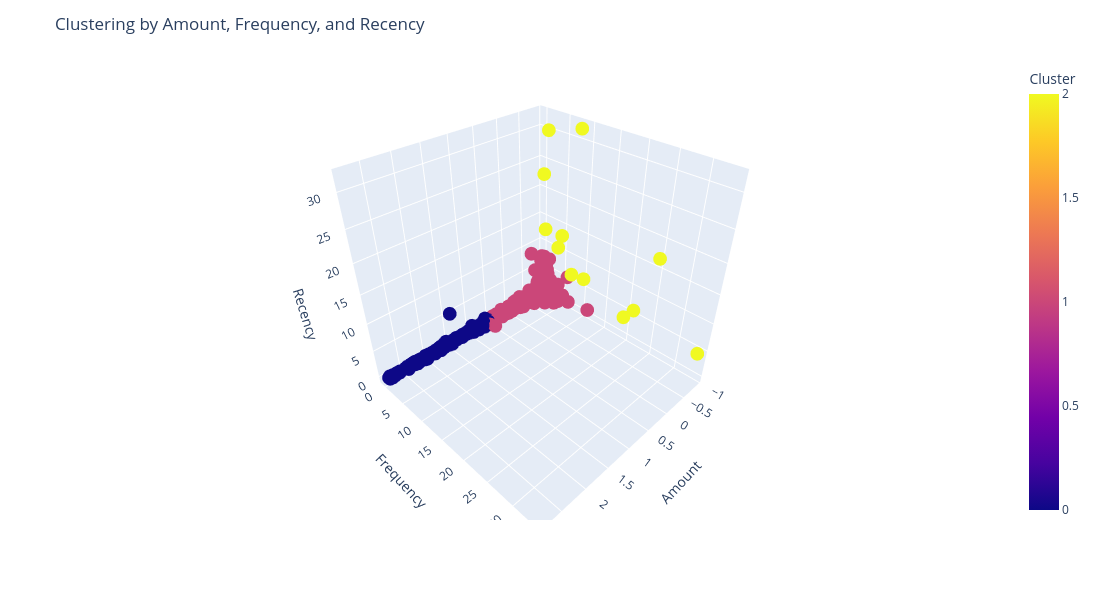

In [239]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
final_rfa_df_scaled_knn['Cluster_3D'] = kmeans.fit_predict(data_for_knn_clustering)

# Create a 3D scatter plot matrix with Plotly
fig = px.scatter_3d(final_rfa_df_scaled_knn, x='Amount', y='Frequency', z='Recency', color='Cluster_3D',
                     labels={'Amount': 'Amount', 'Frequency': 'Frequency', 'Recency': 'Recency', 'Cluster_3D': 'Cluster'})

fig.update_layout(
    scene=dict(
        xaxis_title='Amount',
        yaxis_title='Frequency',
        zaxis_title='Recency',
    ),
    title='Clustering by Amount, Frequency, and Recency',
    width=800,
    height=600
)

fig.show()

### DBSCAN

In [241]:
final_rfa_df_scaled_dbscan = final_rfa_df_scaled.copy()

In [242]:
final_rfa_df_scaled_dbscan.head()

Recency  Frequency    Amount
0  0.268172   0.381957 -0.893474
1 -0.024513  -0.267530 -0.168994
2 -0.029137  -0.086878 -0.724760
3 -0.194905  -0.327748  2.163236
4  0.169941   0.007749 -0.556045

In [243]:
final_rfa_df_scaled_dbscan.shape

(4364, 3)

***Finding optimal value for epsilon***

Text(0.5, 1.0, 'k distance graph')

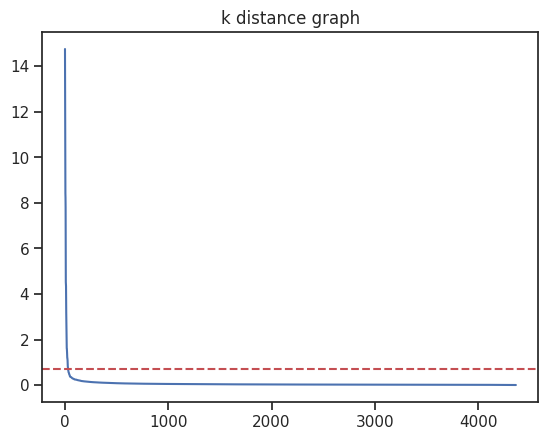

In [263]:
from sklearn.neighbors import NearestNeighbors

# Parameters
# Rule: 2 * dimension
minPts = 2 * final_rfa_df_scaled_dbscan.shape[1]
neighbors = NearestNeighbors(n_neighbors=minPts).fit(final_rfa_df_scaled_dbscan)
distances, idx = neighbors.kneighbors(final_rfa_df_scaled_dbscan)
mean_distances = [d.mean() for d in dist]
mean_distances.sort(reverse=True)
plt.plot(list(range(1, final_rfa_df_scaled_dbscan.shape[0]+1)),mean_distances)
plt.axhline(y=0.7, color='r', linestyle='--')
plt.title('k distance graph')

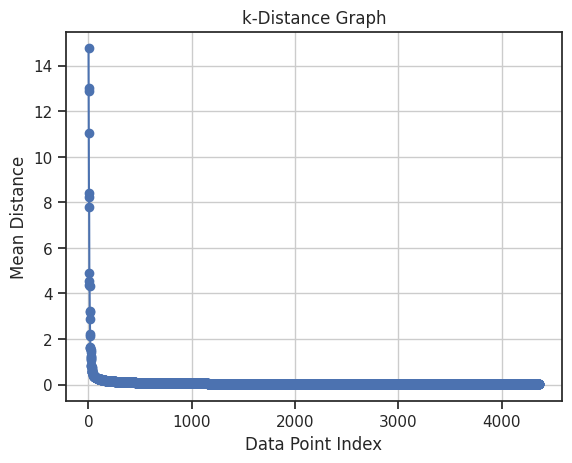

In [264]:
plt.plot(range(1, len(mean_distances) + 1), mean_distances, marker='o')
plt.xlabel('Data Point Index')
plt.ylabel('Mean Distance')
plt.title('k-Distance Graph')
plt.grid(True)
plt.show()

In [276]:
from sklearn.cluster import DBSCAN

# Define your values for eps and minPts
eps = 0.7
minPts = 2 * final_rfa_df_scaled_dbscan.shape[1]

# Create a DBSCAN object and fit it to your data
dbscancluster = DBSCAN(eps=eps, min_samples=minPts, n_jobs=-1)
dbscancluster.fit(final_rfa_df_scaled_dbscan)

# Access the cluster labels
labels = dbscancluster.labels_
num_clusters = len(set(labels))
print("Number of clusters:", num_clusters)

# # Calculate the number of clusters, excluding noise points (label -1)
# num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# print("Number of clusters:", num_clusters)

Number of clusters: 2


In [277]:
from sklearn.metrics import silhouette_score
silhouette_score(final_rfa_df_scaled_dbscan, labels)

0.8737849472465727